# Random Forest: Attack vs All

In [8]:
import os
import sys
import pandas as pd
import sklearn
import matplotlib.pyplot as plt
import seaborn as sn
from sklearn.model_selection import train_test_split

In [9]:
attacks : list = [ 'DNS', 'LDAP', 'MSSQL', 'NetBIOS', 'NTP', 'Portmap', 'SNMP', 'SSDP', 'Syn', 'TFTP', 'UDP', 'UDPLag' ]
datasets: list = [
    "DNS_vs_all.csv" , "LDAP_vs_all.csv"    , "MSSQL_vs_all.csv" , "NetBIOS_vs_all.csv" ,
    "NTP_vs_all.csv" , "Portmap_vs_all.csv" , "SNMP_vs_all.csv"  , "SSDP_vs_all.csv"    ,
    "Syn_vs_all.csv" , "TFTP_vs_all.csv"    , "UDP_vs_all.csv"   , "UDPLag_vs_all.csv"  ,
]
filepath = "./Balanced_Datasets_Baseline/"
filepath2 = ""

In [7]:
baseline_df = pd.DataFrame()
for dataset in datasets:
    temp = pd.read_csv("./Balanced_Datasets_Baseline/" + dataset)
    baseline_df = pd.concat([df,temp])

NameError: name 'df' is not defined

In [ ]:
def run_experiment():
    

In [18]:
baseline_df = pd.read_csv("cleaned_up_data_random_sample.csv")
Y=baseline_df["Label"]
X=baseline_df.drop(["Label"],axis=1)
X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size=0.2)

In [19]:
print(Y.value_counts())

SNMP       59884
UDP        59126
SSDP       59040
NTP        58995
LDAP       58906
MSSQL      58317
TFTP       58266
DNS        58109
NetBIOS    58102
Portmap    55476
UDP-lag    53520
Syn        52322
BENIGN      3022
WebDDoS       67
Name: Label, dtype: int64


In [20]:
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier()


Note: SKLearn handles instances of multiple classes automatically with OvA multi-class classification (unless the model is SVM, which uses OvO). that being said i'm not entirely sure if it does the same with random forest, more investigation is needed.

In [21]:
model.fit(X_train,Y_train)

RandomForestClassifier()

In [22]:
model.score(X_test, Y_test)

0.7105337190094567

<AxesSubplot:>

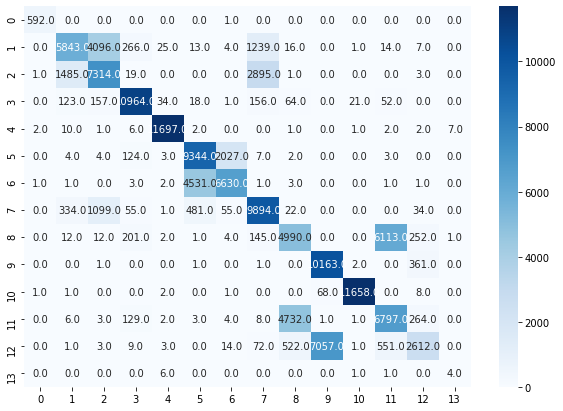

In [23]:
from sklearn.metrics import confusion_matrix, f1_score, recall_score, precision_score
Y_predicted = model.predict(X_test)
cm = confusion_matrix(Y_test, Y_predicted)
plt.figure(figsize=(10,7))
sn.heatmap(cm, annot=True, cmap='Blues', fmt='.1f')

In [25]:
from sklearn.utils.multiclass import unique_labels
unique_labels(Y_test)

array(['BENIGN', 'DNS', 'LDAP', 'MSSQL', 'NTP', 'NetBIOS', 'Portmap',
       'SNMP', 'SSDP', 'Syn', 'TFTP', 'UDP', 'UDP-lag', 'WebDDoS'],
      dtype='<U7')

In [47]:
def plot(Y_test, Y_predicted):
    labels = unique_labels(Y_test)
    column= [f'Predicted{ label}' for label in labels]
    indices = [f'Actual{ label}' for label in labels]
    column= [f'{label}' for label in labels]
    indices = [f'{label}' for label in labels]
    table = pd.DataFrame(confusion_matrix(Y_test,Y_predicted),
                         columns = column, index = indices)
    plt.figure(figsize=(16,11))
    
    return sn.heatmap(table, annot=True, fmt='.1f', cmap="Blues")

<AxesSubplot:>

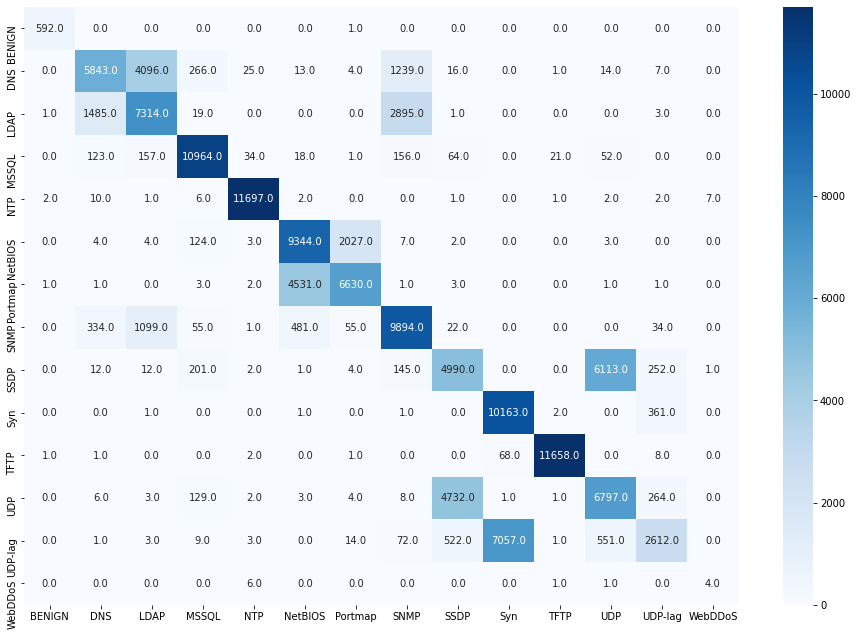

In [48]:
plot(Y_test, Y_predicted)

In [49]:
Y_test.value_counts()

SNMP       11975
UDP        11950
TFTP       11739
SSDP       11733
NTP        11731
LDAP       11718
MSSQL      11590
DNS        11524
NetBIOS    11518
Portmap    11174
UDP-lag    10845
Syn        10529
BENIGN       593
WebDDoS       12
Name: Label, dtype: int64